# 统计建模

在Python中，statsmodels是统计建模分析的核心工具包，其包括了几乎所有常见的各种回归模型、非参数模型和估计、时间序列分析和建模以及空间面板模型等，其功能是很强大的，使用也相当便捷。官方文档https://www.statsmodels.org/stable/user-guide.html

statsmodels包含的模型有：
- 线性模型，广义线性模型和健壮线性模型
- 线性混合效应模型
- 方差（ANOVA）方法分析
- 时间序列过程和状态空间模型
- 广义矩估计

## 估计线性模型
tatsmodels有多种线性回归模型，包括从基本（比如普通最小二乘）到复杂（比如迭代加权最小二乘法）的。

statsmodels的线性模型有两种不同的接口：基于数组和基于公式。它们可以通过API模块引入：

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

为了展示它们的使用方法，我们从一些随机数据生成一个线性模型：

In [3]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)
# For reproducibility
np.random.seed(12345)
N = 100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]
y = np.dot(X, beta) + eps

这里，我使用了“真实”模型和可知参数beta。此时，dnorm可用来生成正态分布数据，带有特定均值和方差。现在有：

In [5]:
 X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [6]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

线性模型通常要拟合一个截距。sm.add_constant函数可以添加一个截距的列到现存的矩阵：

In [7]:
X_model = sm.add_constant(X)

In [8]:
 X_model[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

sm.OLS类可以拟合一个普通最小二乘回归：

In [9]:
model = sm.OLS(y, X)

这个模型的fit方法返回了一个回归结果对象，它包含估计的模型参数和其它内容：

In [10]:
results = model.fit()

In [11]:
results.params

array([0.17826108, 0.22303962, 0.50095093])

对结果使用summary方法可以打印模型的详细诊断结果：

In [12]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              24.42
Date:                Sat, 07 Nov 2020   Prob (F-statistic):                    7.44e-12
Time:                        19:57:36   Log-Likelihood:                         -34.305
No. Observations:                 100   AIC:                                      74.61
Df Residuals:                      97   BIC:                                      82.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

这里的参数名为通用名x1, x2等等。假设所有的模型参数都在一个DataFrame中：

In [14]:
import pandas as pd
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])

In [15]:
data['y'] = y

In [16]:
data[:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [17]:
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()

In [18]:
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [19]:
results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

观察下statsmodels是如何返回Series结果的，附带有DataFrame的列名。当使用公式和pandas对象时，我们不需要使用add_constant。

给出一个样本外数据，你可以根据估计的模型参数计算预测值：

In [20]:
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

statsmodels的线性模型结果还有其它的分析、诊断和可视化工具。除了普通最小二乘模型，还有其它的线性模型。

### 一元线性回归

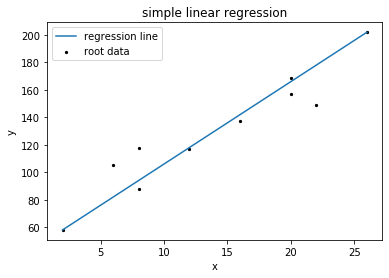

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class SimpleRegress(object):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        self.b0 = 0
        self.b1 = 1
        return

    def calculate_work(self):  # 回归方程中b0、b1的求解
        x_mean = np.mean(self.x_data)  # x_mean= 14.0
        y_mean = np.mean(self.y_data)  # y_mean= 130.0
        x1 = self.x_data - x_mean  # x1= [-12.-8.-6.-6.-2.2.6.6.8.12.]
        y1 = self.y_data - y_mean  # y1= [-72.-25.-42.-12.-13.7.27.39.19.72.]
        s = x1 * y1  # s= [864.200.252.72.26.14.162.234.152.864.]
        u = x1 * x1  # u= [144.64.36.36.4.4.36.36.64.144.]
        self.b1 = np.sum(s) / np.sum(u)  # b1= 5.0
        self.b0 = y_mean - self.b1 * x_mean  # b0= 60.0
        return

    def test_data_work(self, text_data):  # 回归方程的建立与数值预测
        result = list([])
        for one_test in text_data:
            y = self.b0 + self.b1 * one_test
            result.append(y)
        return result

    def root_data_view(self):  # 绘制源数据可视化图
        plt.scatter(x_data, y_data, label='simple regress', color='k', s=5)  # s 点的大小
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        return

    def test_data_view(self):  # 绘制回归线
        # 绘制回归线两个点的数据
        x_min = np.min(self.x_data)
        x_max = np.max(self.x_data)
        y_min = np.min(self.y_data)
        y_max = np.max(self.y_data)
        x_plot = list([x_min, x_max])
        y_plot = list([y_min, y_max])
        # 绘制
        plt.scatter(x_data, y_data, label='root data', color='k', s=5)  # s 点的大小
        plt.plot(x_plot, y_plot, label='regression line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('simple linear regression')
        plt.show()
        return

x_data = list([2, 6, 8, 8, 12, 16, 20, 20, 22, 26])
y_data = list([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])
test_data = list([16])
sr = SimpleRegress(x_data, y_data)
sr.calculate_work()
result = sr.test_data_work(test_data)  # result= [140.0]
# sr.root_data_view()
sr.test_data_view()